In [1]:
# Run the top two cells in this notebook first, every time you reopen your notebook.
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
# Some imports that may be helpful in later cells
import numpy as np
import matplotlib.pyplot as plt
import animal_guessing_game

### Animal Guessing Game

In the first few parts of this problem you'll be playing a guessing game. The computer chooses an animal at random, and your goal is to guess which animal has been chosen. You will first be shown two features of the animal and asked to make a guess. If you guess incorrectly, more features will be shown and you'll get more chances to guess the animal. Your score is the total number of tries it takes you to guess the animal. 

<div class="alert alert-success">Play five iterations of the guessing game by uncommenting and running the cell below; your results will be saved in the data folder to allow you to analyze them later. You should also submit this file when you upload your assignment. (Note: Some of these features are rather odd - do your best).
<p><p>
After running the whole game and checking that your data file is saved in the data folder, you may want to comment out this cell so that you can use "Run All" to run all subsequent cells and not have to play the game each time.</div>

In [3]:
trials = animal_guessing_game.play_game("data/classes.txt","data/predicates.txt", "data/predicate-matrix-binary.txt")

----------------------------------------------------------------------
Features: ['hooves', 'domestic']
Animals: ['ox', 'bobcat']
Your guess: ox
Correct!

----------------------------------------------------------------------
Features: ['spots', 'toughskin']
Animals: ['fox', 'blue whale', 'mole', 'gorilla']
Your guess: blue whale
Correct!

----------------------------------------------------------------------
Features: ['oldworld', 'active']
Animals: ['beaver', 'gorilla', 'otter', 'giant panda', 'polar bear', 'ox', 'mouse', 'weasel']
Your guess: giant panda
Sorry, try again.

Features: ['oldworld', 'active', 'weak']
Animals: ['beaver', 'gorilla', 'otter', 'giant panda', 'polar bear', 'ox', 'mouse', 'weasel']
Your guess: mouse
Correct!

----------------------------------------------------------------------
Features: ['tunnels', 'black']
Animals: ['grizzly bear', 'raccoon', 'mouse', 'horse', 'bat', 'bobcat', 'seal', 'gorilla', 'otter', 'hamster', 'beaver', 'persian cat', 'dolphin', 'squi

<div class="alert alert-success">Briefly, describe your experience playing the game. Did it become more difficult with more animals? Do you feel like this difficulty scaled linearly (i.e., was it twice as hard to play with twice as many animals, or was it less than twice as hard, or more than twice as hard)?</div>

I think the game becomes much harder when the number of animals increases. As someone who is not a native English speaker, the game becomes even more difficult. I need to search for the animals and then remember the different features. When the number of animals increases, I need to remember more animals, and sometimes I need to search for the same animal twice. Thus, the difficulty is not scaled linearly for me. Instead, it increases exponentially with the increase in animals. 

### Modeling the Animal Guessing Game: Rule-based categories

<div class="alert alert-success">Let's try to model the inferences made by players of this game using a simple program. Your model should play the game by looking at the given choices (animals) and observations (features) and ruling out possible hypotheses. Specifically, write a function <tt>guess(animal_choices, animal_features, animal_names, feature_names, feature_matrix)</tt>, where <tt>animal_choices</tt> and <tt>animal_features</tt> are the possibilities for the animal and the features that have been given to the model so far (animal_names, feature_names, and feature_matrix are the lists representing the data loaded from the text files) in <tt>animal_guessing_game.py</tt> which chooses uniformly at random one of the choices that matches all of the listed features. Uniformly at random means that all animals in <tt>animal_choices</tt> that have the listed features should be equally likely to be chosen.
<p>
In the cell below, test your <tt>guess</tt> function to make sure it behaves correctly.</div>

In [3]:
animal_choices = ['dalmatian', 'squirrel', 'hamster', 'buffalo', 'sheep', 'german shepherd', 'grizzly bear', 'elephant', 'pig', 'skunk', 'tiger', 'killer whale', 'raccoon', 'wolf', 'bat', 'collie', 'dolphin', 'rhinoceros', 'seal', 'mole', 'otter', 'zebra', 'rabbit', 'giant panda', 'rat', 'lion', 'walrus', 'leopard', 'blue whale', 'chimpanzee', 'persian cat', 'horse']
animal_features = ['agility', 'small']
animal_names = animal_guessing_game.load_name_data("data/classes.txt") 
feature_names = animal_guessing_game.load_name_data("data/predicates.txt")
feature_matrix = animal_guessing_game.load_animal_feature_data("data/predicate-matrix-binary.txt")

qualified_animal = []

#Find the qualified animal
for a in animal_choices:
    if feature_matrix[animal_names.index(a)][feature_names.index(animal_features[0])] == 1 and feature_matrix[animal_names.index(a)][feature_names.index(animal_features[0])] == 1:
        qualified_animal.append(a)
print(qualified_animal)

# Test whether the output for guess is in the qualified animal
assert animal_guessing_game.guess(animal_choices, animal_features, animal_names, feature_names, feature_matrix) in qualified_animal

['dalmatian', 'squirrel', 'hamster', 'german shepherd', 'tiger', 'killer whale', 'raccoon', 'wolf', 'bat', 'collie', 'dolphin', 'seal', 'mole', 'otter', 'zebra', 'rabbit', 'rat', 'lion', 'leopard', 'chimpanzee', 'persian cat', 'horse']


<div class="alert alert-success">Now, write a function <tt>model</tt> that will have your computer play 500 iterations of each of the five hypothesis sizes (2, 4, 8, 16, and 32). This function takes no parameters. You'll likely want to make a function like <tt>human_query</tt> for the computer model - e.g., <tt>computer_query</tt>. If you do this, you can use the <tt>run</tt> function that I've written to take care of much of the running of the game. One problem that may arise is what to pass in for stream, as you don't really want to print out all 500*5 games that the computer plays. Instead, you can omit writing out these games by opening a stream like this:
<br>
<tt>stream = open(os.devnull, 'w')</tt>
</br>

Pass this stream to the run function, and you won't see any output.
<p>
<tt>model</tt> does not need to return anything, but it should write out a data file with the model results to "data/model_trial_data.txt". This file should have 500 lines, each with 5 comma-separated numbers that correspond to the number of guesses for each hypothesis size. You're welcome to use the <tt>save_trial_data</tt> function that I wrote to help.
<p><p>
In the cell below, call your <tt>model</tt> function so that it runs and saves the data.
<div>

In [4]:
animal_guessing_game.model()

### Modeling the Animal Guessing-Game: Knowledgeless Play

<div class="alert alert-success">The model above assumes the player knows all the animal-feature pairings. Imagine instead that the player knows only a subset of the feature pairings. We'll model this by assuming that we have a new player for each set of hypothesis sizes, and that player knows about <tt>n</tt> of the 85 features, where <tt>n</tt> is a parameter of the model. <tt>n</tt> random features are chosen, and when the model makes its guesses, it chooses a guess uniformly at random from those options that are consistent with the observed features that it knows about. If it doesn't know about an observed feature, it just ignores it. For example, if the model knows only about "small", and the observed features are "small" and "strainteeth", the model will choose an animal from the available choices that are small. Write a function <tt>bounded_model</tt> that takes in the argument <tt>n</tt> and plays 500 iterations of each of the 5 hypothesis sizes. It should write it's results to a file name "data/bounded_model_trial_data_n.txt", where the <tt>n</tt> is replaced by the value of the parameter <tt>n</tt>. Note that you can likely use a similar structure to the previous part - look at what parameters are taken in by the <tt>human_query</tt> function.
<p>
<p>
In the cell below, run your model with n = 5 and then with n = 20.
<div>

In [5]:
animal_guessing_game.bounded_model(20)
animal_guessing_game.bounded_model(5)

### Analyzing the Results

<div class="alert alert-success">In the cell below, write code to graph the trial data for each of your models as well as trial data that I've included from 294 people who played this game previously (stored in "data/old_trial_data.txt"). Make a line graph with separate lines for each model and for the people, where the x-axis represents the size of the hypothesis set and the y-axis represents the number of guesses. Plot the average across trials - e.g., while 294 people played the game, you'll have just one line for people and the y-value for hypothesis size 2 will the be average number of guesses people required when they had a hypothesis set of size 2. As for all graphs, please make sure your graph is appropriately labeled.

</div>

In [6]:
def read_trial_data(file_path):
    """ Loads a file with the trial data.
    Returns the results as a list of list.
    Parameters:
    file_path: name of the file where trial data are stored """
    f = open(file_path)
    data = []
    for line in f:
        data.append([int(i.strip()) for i in line.split(",")])
    f.close()
    return data

def average_trails(data):
    """Reads a list of trial data.
    Return the average accross each column.
    Parameters:
    data: a list of list that stores the trial data for each person. 
    """
    avg_bins = [0] * len(data[0])
    for row in data:
        for i in range(len(row)):
            avg_bins[i] += row[i]
    return np.array(avg_bins)/len(data)

def plot_model_lines(avg_bins_list):
    """Plot the line between average trials and hypothesis size. 
    Parameter:
    avg_bins_list: A list that stores the average information of from different trial."""
    labels = ["model", "bounded model 5", "bounded model 20", "old trial"]
    i = 0
    for bins in avg_bins_list:
        plt.plot(bins, label = labels[i])
        i += 1
    plt.legend(loc = 'best')
    plt.title("Hypothesis Size vs. Average Trials")
    plt.xlabel("Hypothesis Size")
    plt.ylabel("Average Trials")
    plt.xticks(np.arange(5), [2, 4, 8, 16, 32])

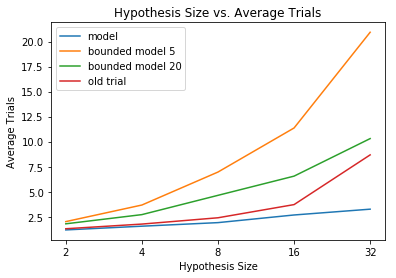

In [7]:
files = ["model_trial_data.txt", "bounded_model_trial_data_5.txt", "bounded_model_trial_data_20.txt", "old_trial_data.txt"]
bins_list = []
for f in files:
    bins_list.append(average_trails(read_trial_data("data/" + f)))
plot_model_lines(bins_list)

<div class="alert alert-success">How do the performances of the models compare to one another and to people? Are there systematic differences between each set of data for how the number of guesses scales with the number of animal choices? Explain your answers. Which model do you think provides the closest match to people? The furthest? For the model that is closest, explain whether you think this model is a good account of people's inductive inferences in this type of guessing games? For the model that is furthest, why do you think this model behaves differently from people? (I.e., what is missing in the model or what assumptions are incorrect that cause it to be a poor account of people's behavior?)
</div>


The model that knows every feature has the best performance while human being provides the second best performance. The model that knows 20 features is the third best, while the model that knows 5 features has the worst performance. The average time for them has some systematic differences. Specifically, the model that has the best performance has the shortest time. When the hypothesis size increases, the average time does not increase linearly and tends to have a steeper slope when the hypothesis size is big. 

The model that knows every feature provides the closest match to people when the hypothesis size is smaller or equal to 16. When the hypothesis size is 32, the model that knows 20 features provides a closer match to people. The result does provide a good account of people's inductive inferences. When the hypothesis size is small, there will be a higher probability for a human being to know the feature of some specific animals, so human will have a similar performance to the model that know everything. However, when the hypothesis size is big enough, there will be more uncertainty for people, and thus the performance will be influenced and will be similar to a bounded model that only know a subset of features. 

The model that only knows 5 features is the furthest to people because,for most of the people, they will know more features. Thus, this model takes far more trials to guess the right animals.

### Finding Rule-based Categories

(Definitions) One of the attractive features of the logical perspective on the world is that it seems to make categorization easy: we can just specify a definition of a category (e.g. "an even number is an integer that can be divided by 2 with no remainder") and check if something belongs to the category by checking if it satisfies the rule. In the next set of questions, you'll use the same dataset as in the previous parts to explore this idea.


<div class="alert alert-success">
In <tt>animal_guessing_game.py</tt>, write a function <tt>find_simplest_rule(target_animal, animal_names, features_names, feature_matrix)</tt> which takes as parameters an animal name, a list of animal names, a list of feature names, and a binary 2-dimensional list of animal-feature pairs (the feature matrix); as in previous parts, each inner list is one animal. This function should find the simplest conjunctive rule for identifying the given animal. A rule identifies an animal if it is true for the target animal and false for all other animals. The rule may include conjunctions of features or their negations. For example, the rule "lean and not strainteeth" would include all animals that have the feature lean and do not have the feature strainteeth. Your function should return a dictionary that has two keys: positive_features, where the value is a list of the names of features that are not negated; and negative_features, where the value is a list of the names of features that are negated. For example, the rule above would be represented by the following dictionary: <tt>{"positive_features" : ["lean"], "negative_features" : ["strainteeth"]}</tt>. The dictionary should return the simplest rule that identifies the target animal. The simplest rule is defined as the one that contains the fewest features (whether or not they are negated).
</div>

<div class="alert alert-success">
In the cell below, include some tests to make sure your function works. At the end, print out the best rule for identifying "elephant" if you give the function all possible features but only include the first 25 animals (that is, the length of animal_names should be 25 and the length of feature matrix should also be 25).
</div>

In [8]:
elephant_rule_25 = animal_guessing_game.find_simplest_rule("elephant", animal_guessing_game.load_name_data("data/classes.txt")[:25], animal_guessing_game.load_name_data("data/predicates.txt"),animal_guessing_game.load_animal_feature_data("data/predicate-matrix-binary.txt")[:25])
print(elephant_rule_25)

{'positive_features': ['tusks'], 'negative_features': []}


In [9]:
animal_guessing_game.find_simplest_rule("elephant", animal_guessing_game.load_name_data("data/classes.txt"), animal_guessing_game.load_name_data("data/predicates.txt"),animal_guessing_game.load_animal_feature_data("data/predicate-matrix-binary.txt"))

{'positive_features': ['tusks', 'longleg'], 'negative_features': []}

<div class="alert alert-success">
In the cell below, print out all animals in the full dataset of 50 animals that are consistent with the "elephant" rule you created above.
</div>

In [10]:
animal_guessing_game.rule_to_animals(animal_guessing_game.load_name_data("data/classes.txt"), animal_guessing_game.load_name_data("data/predicates.txt"),animal_guessing_game.load_animal_feature_data("data/predicate-matrix-binary.txt"), elephant_rule_25)

['elephant', 'rhinoceros', 'walrus']

<div class="alert alert-success">
You may have found that your original rule did not work for the complete dataset, although you could use your function to find a new rule that does work for all 50 animals. If you were to refine your rule with the full dataset, do you think that the new rule would be consistent with all animals you might come in contact with in the world (both elephants and not)? Would continually refining your rule as you come into contact with more animals be an effective way to maintain a correct logical definition of each animal category? Explain your answers and discuss how you think this relates to whether logical definitions are a good model of categorization.
</div>


If we apply the find_simplest_rule function to a dataset with 50 animals, the new rule, which we have found in the previous section, is consistent with the 50 animals but not consistent with the rule we find for 25 animals. We can easily calculate that the number of a distinct number of rules for 85 features is:

$${85 \choose 0}2^{85} + {85 \choose 1}2^{84} + {85 \choose 2}2^{83} + ...+ {85 \choose 84}2^{1} + {85 \choose 85}2^0$$

Of course, some of the rules in the set is not valid because they might not be 'unique rule' for a specific animal. However, this number is still big enough. Thus, it is possible that for most of the animal, they all held one unique rule even if we just have 85 features. 

However, it would not be an effective way to really apply the result in the real world. First, we have not discovered all the animal on the Earth. There are still some new unknown animals that are constantly being discovered. As what we have shown before, the animal rule for a subset of the animal may not hold for all the animal. Thus, if we continue refining the rule when new animals are discovered, the rules for some animals might change. Also, when the number of animals and the number of features increases, we need to constantly refine our input, which includes our animal_name, feature_names, and the matrix. Some difficulty might arise when we want to define the features. Some of the animals may vary in their features even when they are in the same species. Some animal might have features that are hard to distinguish. Thus, it takes time to really develop the complete animal category. 


<div class="alert alert-success">
Assume people do maintain logical definitions of categories. Your function above finds the simplest rule for a particular animal. How does this run time of this function scale with the number of possible features and the number of possible animals? Do you think that the way this scales is a reasonable approximation for how people might form logical categories? Explain why or why not.
</div>

Let $n$ be the number of possible animals and $m$ be the number of possible features. In the worst case, our algorithm will provide a running time of $O(min(n,m)\cdot m^2)$. The detailed analysis of the runtime is included in the code. 

I think this algorithm provides a reasonable approximation for how people might form logical categories when the number of possible animals and the number of possible features are relatively small. In that scale, human can distinguish different animals by the unique features that they come up with that describe the animals. However, if the scale increases, it will be impossible for the human brain to process all the information, and find the 'unique rule'. People tend to remember more trivial features about something that they are interested in, which might not necessarily be the 'unique rule' and that's why people cannot have similar performance as the model that knows everything in previous section. 